In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
url_dados = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'

dados = pd.read_csv(url_dados)

In [56]:
# Começando o tratamento de dados

In [57]:
#dados.Valor[0]
dados["Valor"][0]   # visualizando como está escrito meu valor

'R$ 7.000.000'

In [58]:
dados["Valor"][0].split() #separar minha string por espaço (também pode ser qualquer outro caractere)

['R$', '7.000.000']

In [59]:
dados["Valor"].str.split(expand = True)   #separando o field por espaços e strings e separar em colunas as separações

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [60]:
dados["Valor"].str.split(expand = True)[2].unique()   #diz quais valores são iguais e o tipo

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [61]:
dados[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)    #inserindo meus novos dados/coluna no meu dataset
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [62]:
#removendo os Tipo_anuncio que nao são vazios 
dados['Tipo_anuncio'].isnull()

0         True
1         True
2         True
3         True
4         True
         ...  
10003     True
10004     True
10005     True
10006    False
10007     True
Name: Tipo_anuncio, Length: 10008, dtype: bool

In [63]:
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]


In [64]:
dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)   #convertendo minha coluna pra nuemro e adicionando ao meu dataset

C:\Users\Cliente\AppData\Local\Temp/ipykernel_2616/1564078863.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)   #convertendo minha coluna pra nuemro e adicionando ao meu dataset
C:\Users\Cliente\AppData\Local\Temp/ipykernel_2616/1564078863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)   #convertendo minha coluna pra nuemro e adicionando ao meu dataset


<AxesSubplot:ylabel='Frequency'>

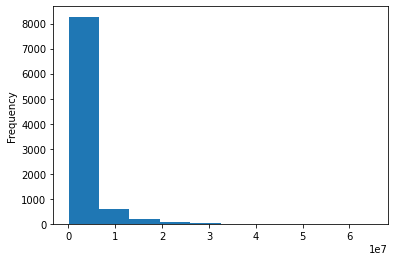

In [65]:
dados_vendas["Valor_anuncio_float"].plot.hist(bins = 10)

In [66]:
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [67]:
dados_vendas[["Rua", "Bairro", "Cidade"]].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

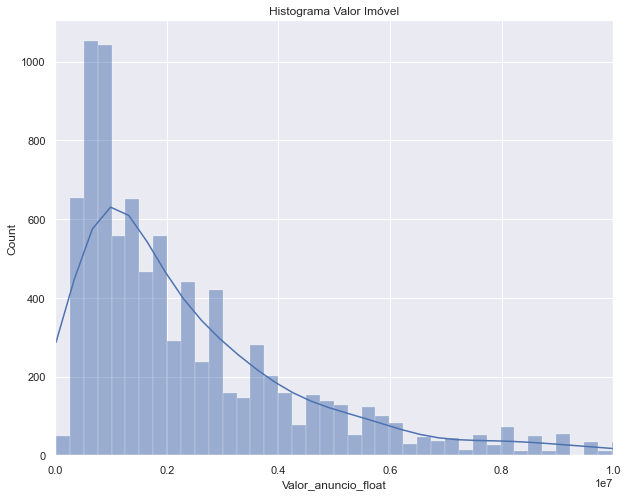

In [71]:
sns.set()
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = dados_vendas, x = "Valor_anuncio_float", kde = True)
ax.set_title("Histograma Valor Imóvel")
plt.xlim((-50, 10000000))
plt.show()

# EXERCICIOS

## 1- Criar uma escala de valores em milhões

## 2- Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)

## 3- Preço do metro quadrado por bairro e plotar em um gráfico ideal

## 4- Explorar as bibliotecas de visualizações e colocar as suas conclusão

## 5- Pesquisar um visualização para analisar os quartis, mediana e outliers